# Exercise 2 

Exercise 2 includes four problems that you need to solve with programming, and by providing answers to questions. For each problem you need to modify the notebook by adding your own solutions. Remember to save and commit your changes locally, and push your changes to GitHub after each major change! Regular commits will help you to keep track of your changes (and revert them if needed). Pushing your work to GitHub will ensure that you don't lose any work in case your computer crashes (can happen!).

**Due date**

This exercise should be returned to your personal Github repository within **two weeks** after the first practical session (by Wednesday 23:59). Please notice that finishing the programming exercises can take significant amount of time (especially if you don't have yet much programming experience). Hence, **it is recommended that you start immediately working on them**.

**Start your exercise in CSC Notebooks**

Before you can start programming, you need to launch the CSC Notebook instance and clone your Exercise repository there using Git. If you need help with this, [read the documentation on the course site](https://spatial-analytics.readthedocs.io/en/latest/lessons/L1/git-basics.html).

**Hints**

If there are general questions arising from this exercise, we will add hints to the course website under [Exercise 2 description](https://spatial-analytics.readthedocs.io/en/latest/lessons/L2/exercise-2.html).

## Problem 1: Prepare and explore the data (7 points)

Next, you will study areal data describing the population distribution in Helsinki Region. The data is provided by Statistics Finland. We will obtain the data using the WFS API of Statistics Finland, which is handy because we can directly read the data into geopandas by passing a special request call to it (which we provide below). 


1. Download the data from Statistics Finland into a GeoDataFrame using the `gpd.read_file()` function

2. Create a subset of the data by selecting municipalities for Helsinki Region (i.e. "kunta" with values "091", "049", "092" and "235")

3. Reset the index using `data.reset_index(drop=True)` which will ensure that the index values in your data increase sequentially starting from 0.

3. Drop all other columns except "geometry", "pt_vakiy" and "postinumeroalue" (postal code) --> i.e. select those columns from the data (check [Geo-Python course](https://geo-python-site.readthedocs.io/en/latest/notebooks/L5/exploring-data-using-pandas.html#selecting-columns) for help).

4. Re-project the data into EPSG:3067 (EUREF-FIN)

5. Calculate the population density into a column `"pop_density_km2"` for each postal code (pop per square kilometer). Notice, that after the reprojection, the geometrical units are represented as meters.

6. Answer to following questions by adding text after the `Answer` bullet points below (use programming to find out the answers for the first two questions):

 - Which postal code area has the **highest** population density? How many people per square kilometer there are?
     - Answer:
 - Which postal code area has the **lowest** population density? How many people per square kilometer there are?
     - Answer:
 - Why is it important to use population density instead of the original population count in the analysis? Describe.
     - Answer: 

7. Re-project the data back to WGS84 (EPSG:4326) and create an interactive map showing the population density in Helsinki Region. For doing the interactive map, you can use a method `data.explore("pop_density_km2"`). As a result, you should get something like below:

![Helsinki Region Population density](img/helsinki_pop_density.png)




<AxesSubplot:>

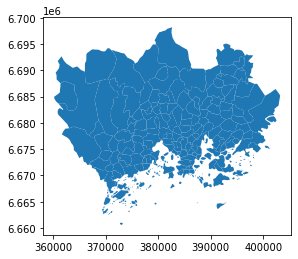

In [16]:
import geopandas as gpd

# URL for postal code level data from Statistics Finland
url = "http://geo.stat.fi/geoserver/postialue/wfs?request=GetFeature&typename=postialue:pno_tilasto_2020&outputformat=JSON"

# YOUR CODE HERE
# TODO Download the data from Statistics Finland into a GeoDataFrame using the gpd.read_file() function
gdf = gpd.read_file(url)

# TODO Create a subset of the data by selecting municipalities for Helsinki Region (i.e. "kunta" with values "091", "049", "092" and "235")
municipalities = ['091', '049', '092', '235']
helsinki_region_gdf = gdf[gdf['kunta'].isin(municipalities)]

# TODO Reset the index using data.reset_index(drop=True) which will ensure that the index values in your data increase sequentially starting from 0.
helsinki_region_gdf.reset_index(drop=True)

# TODO Drop all other columns except "geometry", "pt_vakiy" and "postinumeroalue" (postal code) --> i.e. select those columns from the data (check Geo-Python course for help).


# TODO Re-project the data into EPSG:3067 (EUREF-FIN)

# TODO Calculate the population density into a column "pop_density_km2" for each postal code (pop per square kilometer). Notice, that after the reprojection, 
# the geometrical units are represented as meters.

# TODO Answer to following questions by adding text after the Answer bullet points below (use programming to find out the answers for the first two questions):

#Which postal code area has the highest population density? How many people per square kilometer there are?
#Answer:

#Which postal code area has the lowest population density? How many people per square kilometer there are?
#Answer:

#Why is it important to use population density instead of the original population count in the analysis? Describe.
#Answer:

# TODO Re-project the data back to WGS84 (EPSG:4326) and create an interactive map showing the population density in Helsinki Region. For doing the interactive map, 
# you can use a method data.explore("pop_density_km2"). As a result, you should get something like below:



## Problem 2: Investigate spatial autocorrelation (8 points)

1. Create spatial weights based on how the boundaries of our postal code areas touch each other. Create the weights based on the data GeoDataFrame using Queen contiguity and store the resulting weights into a variable `w`. For creating the spatial weights, you can use the weights submodule from pysal library (see docs). If you need further information, we also recommend checking [chapter 4](https://geographicdata.science/book/notebooks/04_spatial_weights.html) from "Geographic Data Science with Python" book (Rey et al. forthcoming). 

2. Drop possible islands (for the sake of simplicity we just ignore them in the analysis). You can get the index values of the islands from the weights by calling `w.islands`. Then, reset the index of the GeoDataFrame, and recreate the weights using Queen contiguity (in a similar manner as in step 1)

3. Row standardize the weights by using `w.transform`.

4. Answer to following questions by adding text after the `Answer` bullet point, below (hint: check the lecture materials/videos):

  - Why do we need to create spatial weights? For what purpose are they for?
      - Answer:
  - What happens to the spatial weights after row standardization?
      - Answer:
  - Why is it important/good to row standardize spatial weights?
      - Answer:

5. Calculate the Moran's I based on the **population density** and using the spatial weights that we created in the previous step. For doing this, you can use the `Moran()` function from the pysal library, which accepts the Series of our population density column as one parameter and the weights as another, check the pysal docs for details. 

6. What is the global Moran's I for our data? 

7. Create a Moran plot based on our data that allows us to investigate the spatial autocorrelation visually. For doing this, you can use a `plot_moran()` -function from pysal's splot submodule. Sanity check: if everything is correct Moran plot should produce something like following (Moran's I value is hidden):

![Moran plot](img/Moran_plot.png)

8. Answer to following questions by adding text after the `Answer` bullet points below (hint: check the lecture materials/videos):

 - Based on the Moran's I, is there spatial autocorrelation in the data? Is it positive or negative?
     - Answer:
 - What does the result mean? I.e. describe what the spatial autocorrelation indicates in this case? 
     - Answer:
 - Why is it important to understand whether your data is spatially autocorrelated (or not)?
     - Answer: 



In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Problem 3 - Repeate the analysis for an attribute of your own interest (4 points)

Download the data from Statistics Finland into a GeoDataFrame using the `gpd.read_file()` function in a similar manner as was done in the Problem 1. Choose an attribute that interests you (there are plenty to choose from!), and repeat the spatial autocorrelation analysis in a similar manner as was done in Problem 2. You can also investigate other municipalities than the ones in Helsinki Region, if you wish (optional). Read the definitions and documentation for all attributes of the Statistical dataset from pages 5-7 in [this PDF file](https://www.stat.fi/static/media/uploads/tup/paavo/paavo_kuvaus_en.pdf).

Based on this analysis, describe whether your data is spatially autocorrelated or not: Write a short summary of your findings (few sentences).

In [ ]:
# URL for postal code level data from Statistics Finland
url = "http://geo.stat.fi/geoserver/postialue/wfs?request=GetFeature&typename=postialue:pno_tilasto_2020&outputformat=JSON"

# YOUR CODE HERE
raise NotImplementedError()

## Problem 4 - How long did it take? Optional feedback (1 point)

To help developing the exercises, and understanding the time that it took for you to finish the Exercise, please provide an estimate of how many hours you spent for doing this exercise?

 - I spent approximately this many hours: **X hours**
 
In addition, if you would like to give any feedback about the exercise (optional), please provide it below:

 - My feedback: